In [2]:
import pydot
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import uuid

def create_node_id():
    # Returns a unique identifier which is needed for nodes.
    return str(uuid.uuid1())

def plot_tree(tree_dictionary, tmp_filename='kdd_tree.png'):
    
    # Create the graph.
    graph = pydot.Dot(graph_type='graph')
    create_node(tree_dictionary, graph)
    
    # Create a temporary png file with the drawn graph.
    graph.write_png(tmp_filename)
    img = mpimg.imread(tmp_filename)
    
    # Plot the png file.
    plt.figure()
    plt.axis('off')
    plt.imshow(img, interpolation='bicubic')
    plt.show()

def create_node(tree_dictionary, graph=None):
    
    # Create the current (root-)node.
    parent_node = pydot.Node(create_node_id(), label=tree_dictionary['node_name'])
    graph.add_node(parent_node)
    
    # If the current node has no children/is a leaf, add a box shape to it.
    if 'children' not in tree_dictionary:
        parent_node.set_shape('box')
    
    # Otherwise, create edges to recursively created child nodes.
    else:
        for edge_name, child_tree in tree_dictionary['children'].items():
            child_node = create_node(child_tree, graph)
            edge = pydot.Edge(parent_node, child_node, label=edge_name)
            graph.add_edge(edge)
    
    return parent_node

example_tree_dict = {
    'node_name': 'outlook',
    'children': {
        'rain': {
            'node_name': 'windy', 
            'children': {
                'True': {'node_name': 'N'},
                'False': {'node_name': 'P'}
            },
        },
        'overcast': {'node_name': 'P'},
        'sunny': {
            'node_name': 'humidity',
            'children': {
                'normal': {'node_name': 'P'},
                'high': {'node_name': 'N'}
            },
        }
    }
}


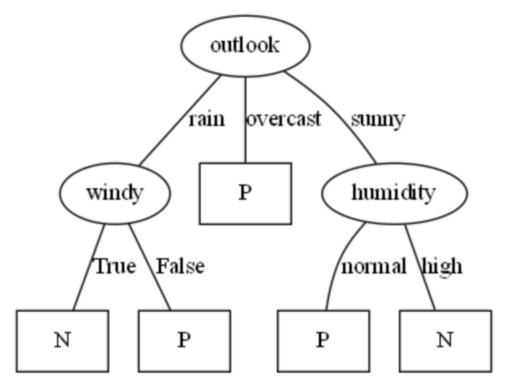

In [3]:
if __name__ == "__main__":
    plot_tree(example_tree_dict)

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))